In [1]:
from sklearn import svm
from sklearn.datasets import load_breast_cancer
Data = load_breast_cancer()
X= Data.data
y = Data.target
clf = svm.SVC(C =0.01, kernel ='rbf', random_state=33)
clf.fit(X, y)

SVC(C=0.01, random_state=33)

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
BreastCancerData = load_breast_cancer()

# Define X (independent variables) and y (dependent variables)
X = BreastCancerData.data
y = BreastCancerData.target

# Print size of the dataset
print("Breast cancer dataset dimensions: {}".format(X.shape))    

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# Import k-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier

# Build a k-nearest neighbor object
knn = KNeighborsClassifier(n_neighbors = 2)

# Train(fit) model
knn.fit(X_train, y_train)

# Predict both training and test data with the fitted model
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

# Performance of the model
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_test_predict))


Breast cancer dataset dimensions: (569, 30)
Accuracy of the model for training set: 0.978
Accuracy of the model for test set: 0.912



## Grid Search for Hyper-Parameter Tuning

We reached an accuracy of 0.912 for the test data set, which is a good score. However, remember that we have arbitrarily selected a value for the hyper-parameter of the model, k. Let us now implement scikit learn’s GridSearchCV.

In [3]:
# import GridSearchCV from sklearn's model selection package
from sklearn.model_selection import GridSearchCV
# define the range for the hyper-parameter
tuned_parameters = [{'n_neighbors':  np.arange(1,21,1) }]
# create a GridSearchCV object, first argument is the classifier that we have created in the previous code
## tuned_parameters is the variable that contains the name of the hyper-parameters and the range we specified for them
## cv is the number of folds for cross-validation
GridCV = GridSearchCV(knn, tuned_parameters, cv = 5, scoring= 'accuracy')
# Train(fit) the model
GridCV.fit(X_train, y_train)
# Print best hyper-parameter
print("Best parameters set found on development set:")
print(GridCV.best_params_)
# Print the cross-validation score for the best hyper-parameter 
means = GridCV.cv_results_['mean_test_score']
print("Mean cross-validation score: %0.3f"% means[np.argmax(means)])

Best parameters set found on development set:
{'n_neighbors': np.int64(4)}
Mean cross-validation score: 0.965


As we can see, the optimal value for the hyper-parameter k is 4 and with a cross-validation score of 0.965. Note that this score is not the generalization score for the model. We have to train the model with the optimal hyper-parameter once more and predict the test set. The accuracy gained from this prediction will be the “generalization error” of the model.

In [4]:
# Build a k-nearest neighbor object
knn = KNeighborsClassifier(n_neighbors = 4)
# Train(fit) model
knn.fit(X_train, y_train)
# Predict the test data with the fitted model
y_test_predict = knn.predict(X_test)
# Performance of the model
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_test_predict))

Accuracy of the model for test set: 0.965



## Validation Curve for Hyper-Parameter Tuning
One may ask how we decided on the range of the hyper-parameter (from 1 to 20). Should we try 25 or 50 as well? How large should be our search range? In general, it is recommended to start with a wide range, then search more detailed around the optimal obtained value. For example, we could start with values 1,5,10,15,20. Then, if k = 5 was better than the others, we could start an extensive search around 5 (3,4,5,6,7). However, a better and visual way for understanding the validity of the selected range is validation curve.

We are already familiar with the validation curves from lesson 4. We will plot the accuracy of the model against the range of the hyper-parameter. If the test score keeps growing for the largest value in our range, then we should broaden the range. Otherwise, we will see the maximum accuracy somewhere around the middle of the plot. Let us plot a validation curve for our only hyper-parameter in kNN algorithm. We will use the data in the previous section. Also, we will assume that the data is loaded and the required packages are imported.



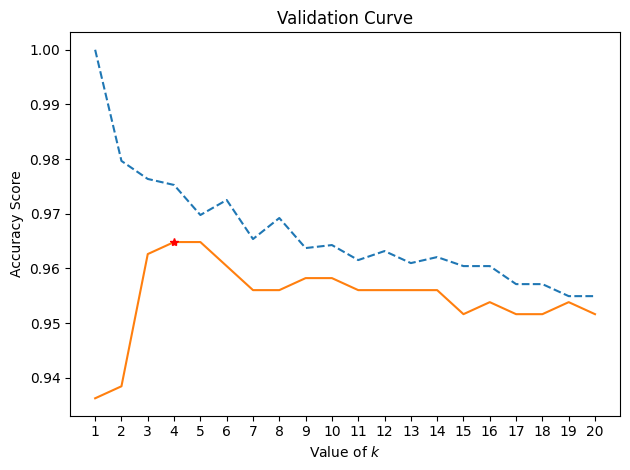

In [6]:
import matplotlib.pyplot as plt
# Import validation_curve function from scikit-learn package
from sklearn.model_selection import validation_curve
# Define the range of parameter to be tested
param_range = np.arange(1,21,1)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(knn, X_train, y_train, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy")
# Calculate mean for training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
# Plot validation curve lines (mean of training and test scores)
plt.plot(param_range, train_mean, '--',label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")
# Specify the optimal k
plt.plot(param_range[np.argmax(test_mean)],np.max(test_mean),'r*')
# Add title and labels and show the plot
plt.xticks(param_range)
# Set the title of the plot
plt.title("Validation Curve")
# Set axis labels
plt.xlabel("Value of $k$")
plt.ylabel("Accuracy Score")
plt.tight_layout()
# Show the plot
plt.show()